In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../code/')
from diusst_model_temporary import diusst_bayesian as diusst
from interpolation import *
from diusst_funcs import *

In [2]:
data_interval = [1149,1471]
data_orig = pd.read_csv('../data/bayesian_training/training_minnett_ssterr03-10_humid10.csv')[data_interval[0]:data_interval[1]]

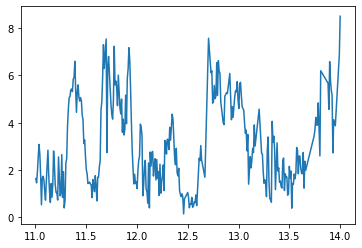

In [3]:
plt.plot(data_orig['times']/86400,data_orig['wind'])

In [4]:
data_cfl, dt_list = cfl_interpolation(data_orig,dz0=0.001,ngrid=50, k_eddy_max=5e-4)

+++ Variable time-step interpolation +++
Interpolated dataset has 148046 time steps with average length 4.57 s.
Constant dt interpolation would require dt = 0.434 s --> 661432 steps.
Computation time will be reduced by 77.617 %
++++++++++++++++++++++++++++++++++++++++


In [5]:
make_mesh(0.01,50)

(array([ 1.00000000e-02,  0.00000000e+00, -1.00000000e-02, -2.09575502e-02,
        -3.29643410e-02, -4.61208422e-02, -6.05371446e-02, -7.63338803e-02,
        -9.36432328e-02, -1.12610043e-01, -1.33393020e-01, -1.56166072e-01,
        -1.81119758e-01, -2.08462885e-01, -2.38424253e-01, -2.71254573e-01,
        -3.07228561e-01, -3.46647239e-01, -3.89840454e-01, -4.37169636e-01,
        -4.89030825e-01, -5.45857983e-01, -6.08126627e-01, -6.76357807e-01,
        -7.51122465e-01, -8.33046215e-01, -9.22814575e-01, -1.02117871e+00,
        -1.12896170e+00, -1.24706545e+00, -1.37647823e+00, -1.51828294e+00,
        -1.67366616e+00, -1.84392810e+00, -2.03049348e+00, -2.23492343e+00,
        -2.45892858e+00, -2.70438334e+00, -2.97334164e+00, -3.26805403e+00,
        -3.59098663e+00, -3.94484164e+00, -4.33258004e+00, -4.75744635e+00,
        -5.22299574e+00, -5.73312382e+00, -6.29209922e+00, -6.90459933e+00,
        -7.57574941e+00, -8.31116547e+00, -9.11700132e+00, -1.00000000e+01]),
 1.0957550

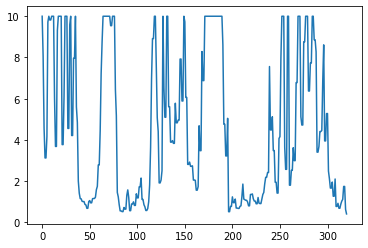

In [6]:
plt.plot(dt_list)

In [121]:
kappa = 5e-5
mu = 1e-3
attenu = 2

dz0 = [0.15,0.1,0.03,0.02,0.01]

ngrid = 50
diffu = 1
opac = 1
k_mol = 1e-7
maxwind = 10

In [122]:
ftemp = np.mean(data_cfl['ftemp'].to_numpy(np.float64))
sst_data = data_cfl['sst'].to_numpy(np.float64) - data_cfl['ftemp'].to_numpy(np.float64)
sst_err = data_cfl['sst_err'].to_numpy(np.float64)
times = data_cfl['times'].to_numpy(np.float64)
wind = data_cfl['wind'].to_numpy(np.float64)
atemp = data_cfl['atemp'].to_numpy(np.float64)
swrad = data_cfl['swrad'].to_numpy(np.float64)
humid = data_cfl['humid'].to_numpy(np.float64)

simu = []
for i in range(len(dz0)):
    simu.append(diusst(
            times, atemp, swrad, u_data=wind, sa_data=humid, T_f=ftemp,
            k_eddy=kappa, mu=mu, attenu=attenu,
            opac=opac, k_mol=k_mol,
            dz=dz0[i], ngrid=ngrid))
    print(str(i)+' done')

0 done
1 done
2 done
3 done
4 done


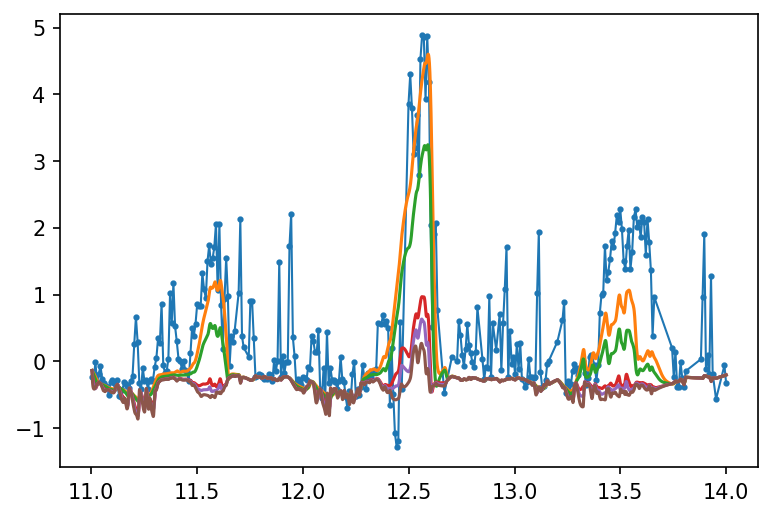

In [107]:
ftemp = np.mean(data_orig['ftemp'].to_numpy(np.float64))
sst_data = data_orig['sst'].to_numpy(np.float64) - data_orig['ftemp'].to_numpy(np.float64)
sst_err = data_orig['sst_err'].to_numpy(np.float64)
times = data_orig['times'].to_numpy(np.float64)
wind = data_orig['wind'].to_numpy(np.float64)
atemp = data_orig['atemp'].to_numpy(np.float64)
swrad = data_orig['swrad'].to_numpy(np.float64)
humid = data_orig['humid'].to_numpy(np.float64)

fig, ax = plt.subplots(dpi=150)
ax.plot(times/86400,sst_data,'-o',markersize=2,lw=1, label='Data')
for i in range(len(dz0)):
    ax.plot(data_cfl['times']/86400,simu[i][0][:,0]-ftemp,label=dz0[i])

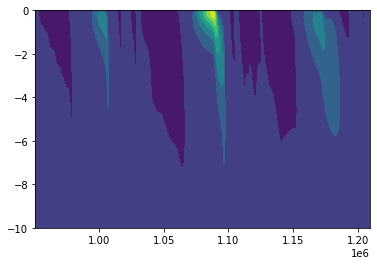

In [105]:
plt.contourf(simu[0][2],simu[0][1],simu[0][0].transpose())

[[], []]

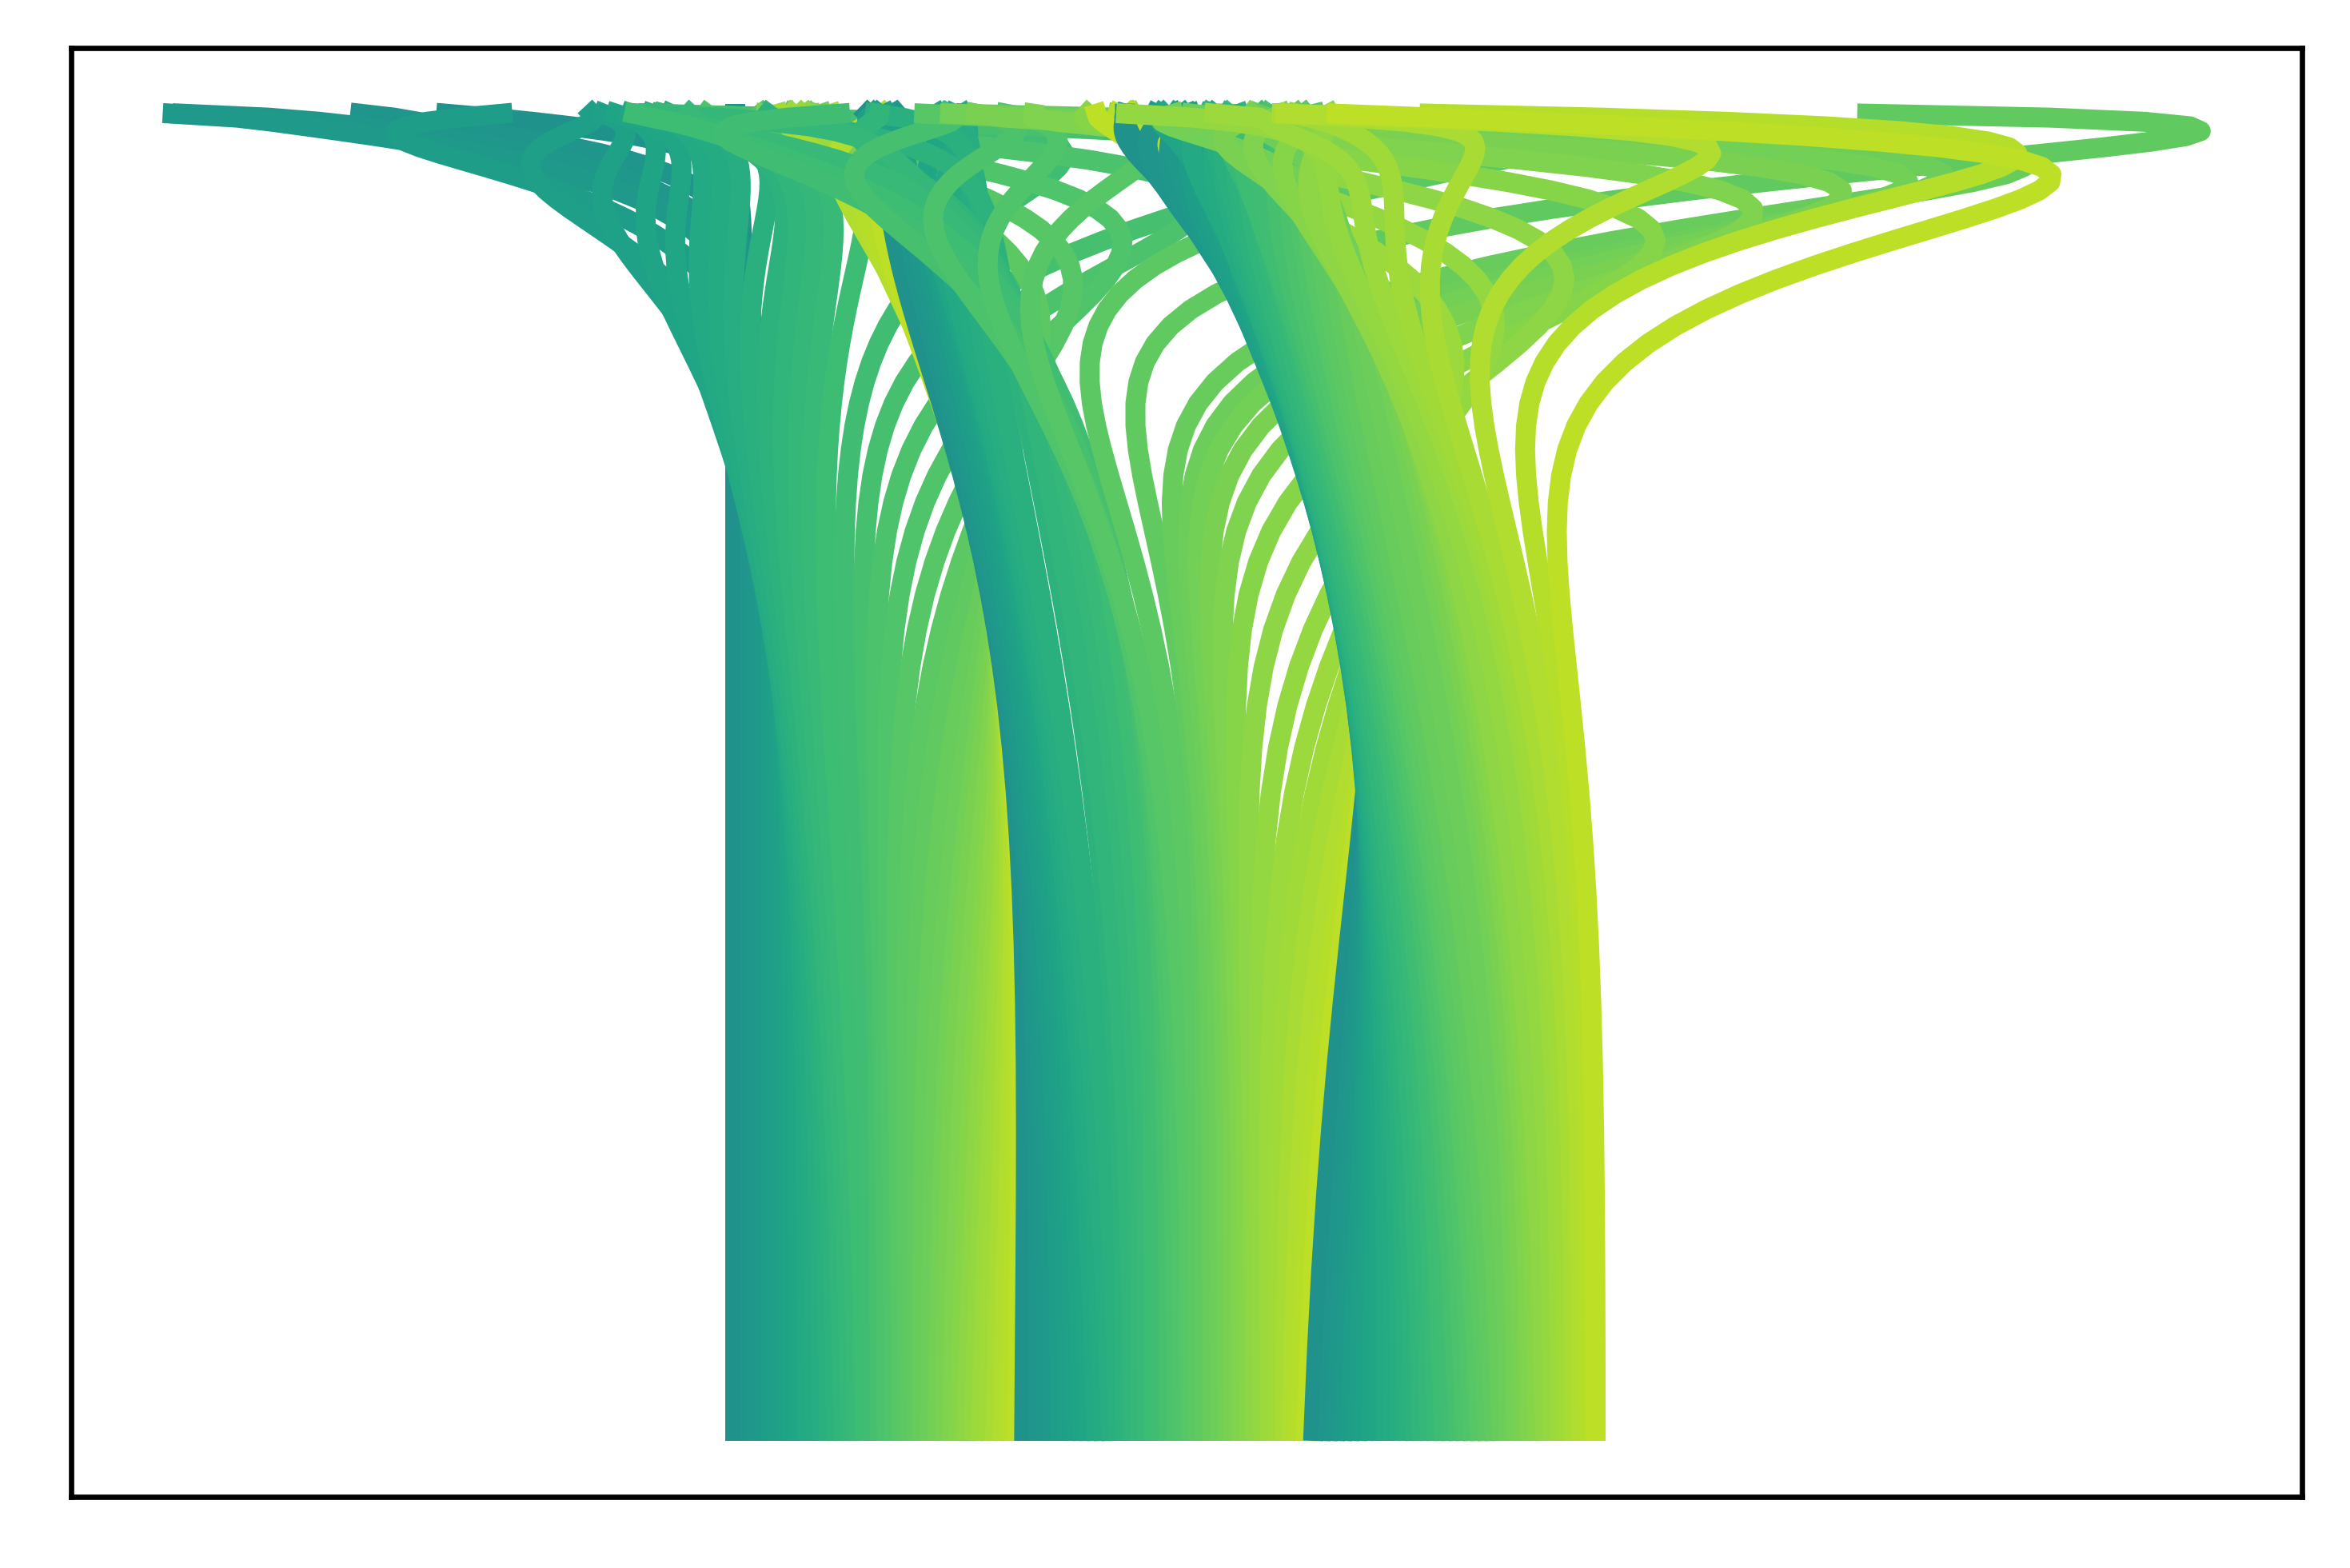

In [128]:
import matplotlib
colors = matplotlib.cm.viridis(np.linspace(0.5,0.9,40))


i=2
fig, ax = plt.subplots(dpi=600)
for j in range(120):
    ax.plot(simu[i][0][j*1000,:]+0.03*j,simu[i][1],c=colors[j%40], lw=3)
ax.set(xticks=[],yticks=[])

In [24]:
np.where(data_cfl['times']/86400>12.5)

(array([ 64203,  64204,  64205, ..., 148043, 148044, 148045]),)